# 题目：knn与普通回归的比较

## 1. 加载数据 转化非数值型数据

In [1]:
import pandas as pd

In [32]:
data=pd.read_csv('Credit.csv')
print(data.head())
data['Gender']=data['Gender'].apply(lambda x:1 if x=='Female' else 0)
data['Student']=data['Student'].apply(lambda x:1 if x=='No' else 0)
data['Married']=data['Married'].apply(lambda x:1 if x=='Yes' else 0)


   ID   Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   1   14.891   3606     283      2   34         11    Male      No     Yes   
1   2  106.025   6645     483      3   82         15  Female     Yes     Yes   
2   3  104.593   7075     514      4   71         11    Male      No      No   
3   4  148.924   9504     681      3   36         11  Female      No      No   
4   5   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331  


In [50]:
def f(x):
    if x=='Caucasian':
        return 0
    elif x=='Asian':
        return 1
    else:
        return 2
data['Ethnicity']=data['Ethnicity'].apply(lambda x:f(x))
data.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,0,1,1,2,333
1,2,106.025,6645,483,3,82,15,1,0,1,2,903
2,3,104.593,7075,514,4,71,11,0,1,0,2,580
3,4,148.924,9504,681,3,36,11,1,1,0,2,964
4,5,55.882,4897,357,2,68,16,0,1,1,2,331


## 2.knn回归（最邻近回归）

### 2.1 简介
特点 1：

    K近邻算法中，输出是该对象的属性值，是其k个最近邻属性值的平均值。该方法对噪声具有较好的鲁邦性，并可以用于非线性回归问题。其中k是用户指定的整数值，该参数的选取高度依赖输入数据。通常较大的k会抑制噪声的影响。

    该节点适合数据记录数小于100万，维度小于100维的回归场景。
    (ps:https://support.huaweicloud.com/algnoderef-mls/mls_02_0052.html)

特点 2：

    最近邻回归是用在数据标签为连续变量，而不是离散变量的情况下。分配给查询点的标签是由它的最近邻标签的均值计算而来的。

    scikit-learn 实现了两种不同的最近邻回归：KNeighborsRegressor 基于每个查询点的 k 个最近邻实现， 其中 k 是用户指定的整数值。RadiusNeighborsRegressor 基于每个查询点的固定半径 r 内的邻点数量实现， 其中 r 是用户指定的浮点数值。

    基本的最近邻回归使用统一的权重：即，本地邻域内的每个邻点对查询点的分类贡献一致。 在某些环境下，对邻点加权可能是有利的，使得附近点对于回归所作出的贡献多于远处点。 这可以通过 weights 关键字来实现。默认值 weights = 'uniform' 为所有点分配同等权重。 而 weights = 'distance' 分配的权重与查询点距离呈反比。 或者，用户可以自定义一个距离函数用来计算权重。
    (ps：http://sklearn.apachecn.org/cn/latest/modules/neighbors.html)

![](http://sklearn.apachecn.org/cn/latest/_images/sphx_glr_plot_regression_0011.png)
### 2.2 实例 利用Credit.csv数据集进行K邻近回归预测

In [68]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# 加载数据集
X=np.array(data.iloc[:,1:11])
y=np.array(data.iloc[:,11:12])
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=33,test_size=0.25)

In [69]:
# 数据预处理
ss_X=StandardScaler()
ss_y=StandardScaler()
X_train=ss_X.fit_transform(X_train)
X_test=ss_X.transform(X_test)
y_train=ss_y.fit_transform(y_train.reshape(-1, 1))
y_test=ss_y.transform(y_test.reshape(-1, 1))

G:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [70]:
# Knn 回归器
uni_knr=KNeighborsRegressor(weights='uniform')   #初始化平均回归的KNN回归器
uni_knr.fit(X_train,y_train)
uni_knr_y_predict=uni_knr.predict(X_test)

dis_knr=KNeighborsRegressor(weights='distance')   #初始化距离加权回归的KNN回归器
dis_knr.fit(X_train,y_train)
dis_knr_y_predict=dis_knr.predict(X_test)

In [72]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print('平均回归的KNN回归器的R平放方值:',uni_knr.score(X_test,y_test))
print('平均回归的KNN回归器的均方误差:',mean_squared_error(y_test,uni_knr_y_predict))
print(' ')
print('距离加权回归的KNN回归器的R平方值:',dis_knr.score(X_test,y_test))
print('距离加权回归的KNN回归器的均方误差:',mean_squared_error(y_test,dis_knr_y_predict))


平均回归的KNN回归器的R平放方值: 0.803336732734382
平均回归的KNN回归器的均方误差: 0.1920093384431812
 
距离加权回归的KNN回归器的R平方值: 0.8125746302446027
距离加权回归的KNN回归器的均方误差: 0.18299005073274308


### 2.3 画图观察图像

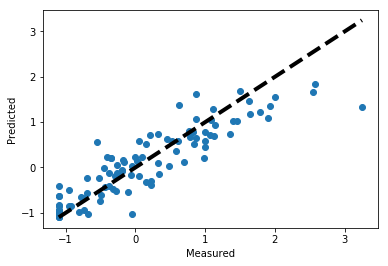

In [74]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, uni_knr_y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# 3. 其他普通回归

In [85]:
# 回归数据
def try_different_method(model):
    model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    result=model.predict(X_test)
    plt.figure()
    plt.plot(np.arange(len(result)),y_test,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predicted value')
    plt.title('score:%f'%score)
    plt.legend()
    plt.show()
# 预测与真实值
def plot_data(model):
    model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    result=model.predict(X_test)
    fig, ax = plt.subplots()
    ax.scatter(y_test, result)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

## 3.1 线性回归

- 简介：
线性回归（Linear regression）是利用称为线性回归方程的最小二乘函数对一个或多个自变量和因变量之间关系进行建模的一种回归分析。这种函数是一个或多个称为回归系数的模型参数的线性组合。只有一个自变量的情况称为简单回归，大于一个自变量情况的叫做多元回归。（这反过来又应当由多个相关的因变量预测的多元线性回归区别，而不是一个单一的标量变量。）
- 理论模型
![](https://upload-images.jianshu.io/upload_images/1531909-290794ef18f2c4f9.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

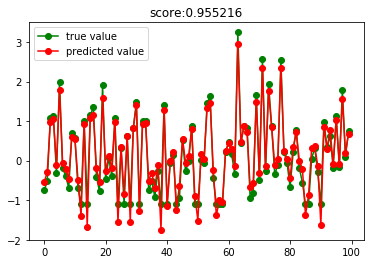

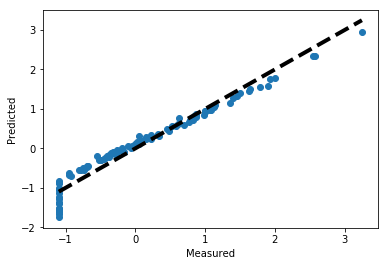

In [86]:
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()
try_different_method(model_LinearRegression)
plot_data(model_LinearRegression)

## 3.2 决策回归

- 简介
![](http://img.my.csdn.net/uploads/201301/04/1357261922_1104.png)

对于回归树有要这么几点认识：

1. 可以捕获Y对Xi的依赖性，上图的结果显示Y对X7和X8没有依赖。也可以充实我们对自变量之间关系的认识。
2. 树的形式简洁、高效。
3. 节点的每次分裂都把原样本空间划分为互不相交的两个子集。每次都根据某个局部标准，选择最好的划分，因此它是一种贪心的爬山算法。
4. 越往树的底层深入，节点覆盖的样本越少，即随着树的生长，估计越来越不可靠。
5. 叶节点同样覆盖了一定数目（1个或多个）的样本。
6. 回归树估计的准确率很大程序上依赖于样本的质量。
7. 因素Xi可以是连续值，也可以是离散值 。
8. 回归树拟合出来的是一个分段零阶函数。

上面也说了每次节点分裂时依据某个局部标准选择最好的划分，一种常用的标准就是：最小平方误差（LS）。

n是样本个数，<xi,yi>是一个数据点，r是预测值。
如果叶节点值取常数，为了使LS最小，应赋予它该叶节点所覆盖的t个样本的目标值的平均值。
https://blog.csdn.net/zhangchaoyangsun/article/details/8461786

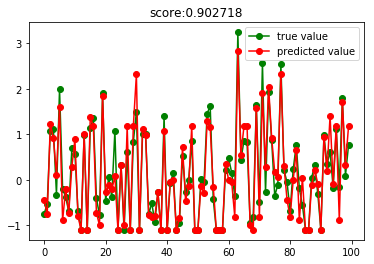

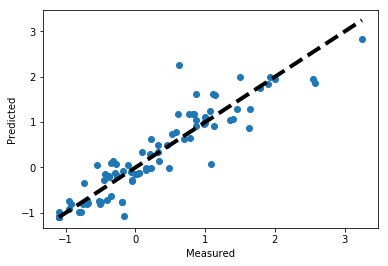

In [88]:
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()
try_different_method(model_DecisionTreeRegressor)
plot_data(model_DecisionTreeRegressor)

## 3.3 岭回归
- 简介

岭回归是一种专用于共线性数据分析的有偏估计回归方法，实质上是一种改良的最小二乘估计法，通过放弃最小二乘法的无偏性，以损失部分信息、降低精度为代价获得回归系数更为符合实际、更可靠的回归方法，对病态数据的拟合要强于最小二乘法。
![](https://upload-images.jianshu.io/upload_images/1531909-ae2e9ce5843987f6.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
- 函数轨迹
下面例子中，alpha为1e-10~1e-2，以对数值等分，对每一个aplha进行一次计算，最后画出岭迹图。岭迹图的
http://sklearn.apachecn.org/cn/latest/supervised_learning.html#supervised-learning

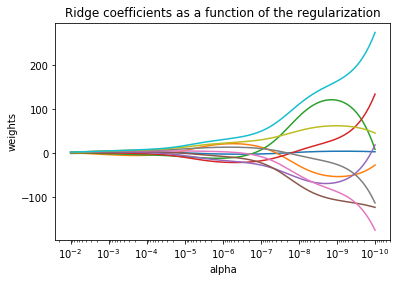

In [91]:
# 函数轨迹
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

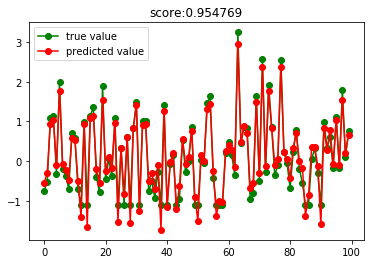

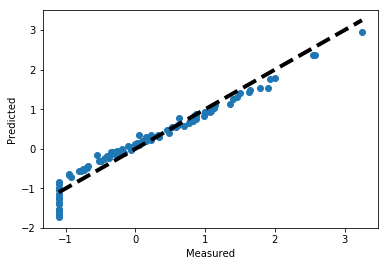

In [92]:
from sklearn.linear_model import Ridge
model_RidgeRegressor=Ridge()
try_different_method(model_RidgeRegressor)
plot_data(model_RidgeRegressor)

## 3.4 Lasso回归
- 最小二乘法的不足
![](https://upload-images.jianshu.io/upload_images/1531909-e95275aaefabaf39.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

对于以上的问题，就有两种方法可以对最小二乘估计进行改进：子集选择和脊归回。子集选择过程中，对变量要么保留，要么剔除，这很可能使得观测数据的一个微小变动就导致要选择一个新的模型，使得模型变得不稳定，但由于模型的变量少了，使得模型的解释性得到了提高；脊回归是一个连续的方法，它在不抛弃任何一个变量的情况下，缩小了回归系数，使得模型相对而言比较的稳定，但这会使得模型的变量特别多，模型解释性差。
- Lasso

基于以上的问题，才有了现在要说的一种新的变量选择技术:Lasso（Least Absolute Shrinkage and Selection Operator）。这种方法使用模型系数的l1范数来压缩模型的系数，使得一些系数变小，甚至还是一些绝对值较小的系数直接变为0，这就使得这种方法同时具有了自己选择和脊回归的优点。

- 目标函数
![](https://upload-images.jianshu.io/upload_images/1531909-f3e7464c0cb7ced0.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

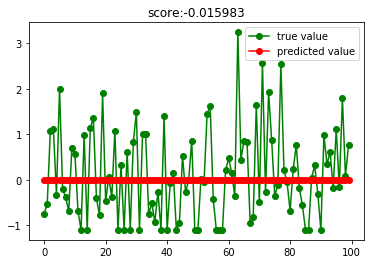

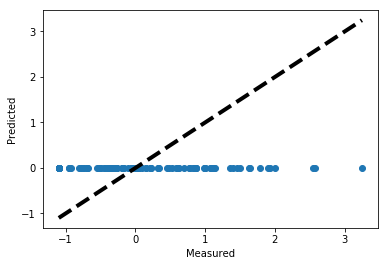

In [94]:
from sklearn.linear_model import Lasso
model_LassoRegressor=Lasso()
try_different_method(model_LassoRegressor)
plot_data(model_LassoRegressor)

## 3.5 SVM回归
![](https://upload-images.jianshu.io/upload_images/1531909-f2b975d9de940f21.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
https://blog.csdn.net/luoshixian099/article/details/51121767

G:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


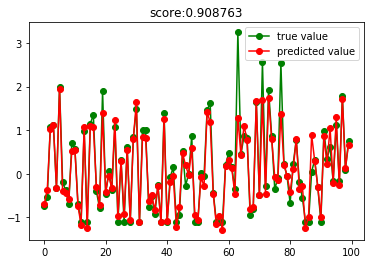

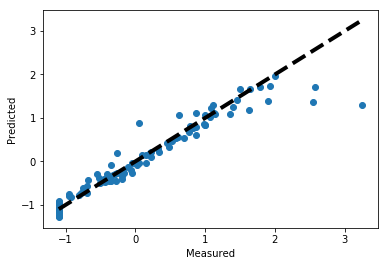

In [95]:
from sklearn import svm
model_SVR = svm.SVR()
try_different_method(model_SVR)
plot_data(model_SVR)

## 3.6 高斯过程回归
高斯过程回归的关键假设是：

> 给定 一些  X 的值，我们对  Y 建模，并假设 对应的这些 Y 值 服从 联合正态分布！

http://dataunion.org/17089.html

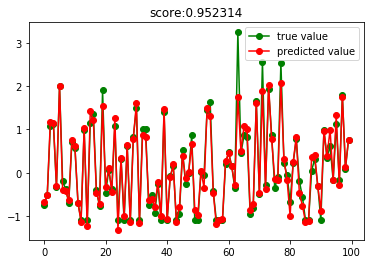

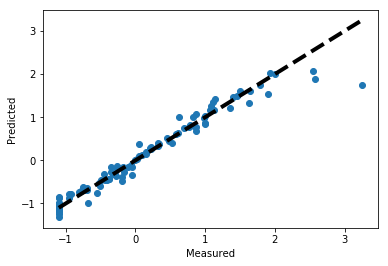

In [97]:
from sklearn import gaussian_process
model_gp = gaussian_process.GaussianProcess(theta0=1e-2, thetaL=1e-4, thetaU=1e-1)
try_different_method(model_gp)
plot_data(model_gp)

## 3.7 随机森林回归

随机森林是决策树的集成算法。随机森林包含多个决策树来降低过拟合的风险。随机森林同样具有易解释性、可处理类别特征、易扩展到多分类问题、不需特征缩放等性质。

随机森林分别训练一系列的决策树，所以训练过程是并行的。因算法中加入随机过程，所以每个决策树又有少量区别。通过合并每个树的预测结果来减少预测的方差，提高在测试集上的性能表现。

随机性体现：
1. 每次迭代时，对原始数据进行二次抽样来获得不同的训练数据。

2. 对于每个树节点，考虑不同的随机特征子集来进行分裂。

除此之外，决策时的训练过程和单独决策树训练过程相同。

对新实例进行预测时，随机森林需要整合其各个决策树的预测结果。回归和分类问题的整合的方式略有不同。分类问题采取投票制，每个决策树投票给一个类别，获得最多投票的类别为最终结果。回归问题每个树得到的预测结果为实数，最终的预测结果为各个树预测结果的平均值。

G:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


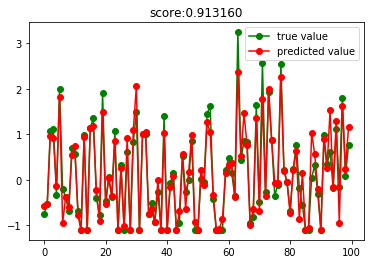

G:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


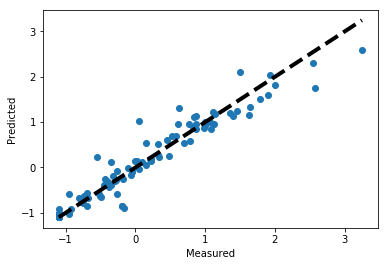

In [98]:
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树
try_different_method(model_RandomForestRegressor)
plot_data(model_RandomForestRegressor)